**Scenario** 
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

**Characters and teams**

**● Cyclistic:** A bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

**● Lily Moreno:** The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.

**● Cyclistic marketing analytics team**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.

**● Cyclistic executive team:** The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

**ASK**
The first phase of the data analysis.In this Phase a data analyst should ask a right questions to drive an entire process in the correct direction.

**Guiding questions****
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

**PREPARE**
1. Where is your data located? 
Data is Uploaded in RStudio.

2. How is the data organized?
Data is a combination of June 2020 to May 2021.

3. Are there issues with bias or credibility in this data? Does your data ROCCC? 
The data has been collected directly from the customer(Riders) by the company. It is also Reliable, Original, Comprehensive, Current, and Cited which satisfies ROCCC.

4. How are you addressing licensing, privacy, security, and accessibility? 
The data has been made available by Motivate International Inc. under this license
https://ride.divvybikes.com/data-license-agreement
and also the data doesn't contain any personal information about the customer.So, it doesn't violating any Privacy/security.

5. How did you verify the data’s integrity? 
The qualities required to verify the data integrity are accuracy, completeness, Timeliness, Validity, consistency, Uniqueness and trustworthiness. 
The data is complete as it contains all the required components to measure the entity. 
The data is consistent across the years with every year having its CSV file which 
is organized in an equal number of columns and same data types. As the credibility 
was proven before, it is also trustworthy.

6. How does it help you answer your question? 
By creating new features like trip_time, Day_of_week from existing features and reducing member_casual feature to have only 2 categories, it is helpful to answer the question.

7. Are there any problems with the data?
Yes, There are some NA and duplicate vales present in the dataset whic need to be removed.


Loaded requiring libraries.

In [65]:
library("dplyr")
library("tidyverse")
library("ggplot2")
library("lubridate")
library("stringr")

Loaded all 12 dataset which i am using in this case study.

In [66]:
June20 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202006-divvy-tripdata.csv")
July20 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202007-divvy-tripdata.csv")
Aug20 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202008-divvy-tripdata.csv")
Sep20 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202009-divvy-tripdata.csv")
Oct20 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202010-divvy-tripdata.csv")
Nov20 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202011-divvy-tripdata.csv")
Dec20 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202012-divvy-tripdata.csv")
Jan21 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202101-divvy-tripdata.csv")
Feb21 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202102-divvy-tripdata.csv")
Mar21 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202103-divvy-tripdata.csv")
Apr21 <-read_csv("../input/cyclistics-data-april-2020-march-2021/202104-divvy-tripdata.csv")
May21 <-read_csv("../input/2021divvytripdatamay/202105-divvy-tripdata.csv")

Rows: 343005 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 551480 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): ride_id, rideable_type, start_station_name, end_station_name, memb...
dbl  (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, e...
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 622361 Columns: 13
── Column specification ─────────────────

Combined 12 datasets into one called trip_data.

In [67]:
trip_data<- rbind(June20, July20, Aug20, Sep20, Oct20, Nov20, Dec20, Jan21, Feb21, Mar21, Apr21, May21)

trip_data is a tbl of [4,073,561 × 13]

In [68]:
str(trip_data)

spec_tbl_df [4,073,561 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:4073561] "8CD5DE2C2B6C4CFC" "9A191EB2C751D85D" "F37D14B0B5659BCF" "C41237B506E85FA1" ...
 $ rideable_type     : chr [1:4073561] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:4073561], format: "2020-06-13 23:24:48" "2020-06-26 07:26:10" ...
 $ ended_at          : POSIXct[1:4073561], format: "2020-06-13 23:36:55" "2020-06-26 07:31:58" ...
 $ start_station_name: chr [1:4073561] "Wilton Ave & Belmont Ave" "Federal St & Polk St" "Daley Center Plaza" "Broadway & Cornelia Ave" ...
 $ start_station_id  : chr [1:4073561] "117" "41" "81" "303" ...
 $ end_station_name  : chr [1:4073561] "Damen Ave & Clybourn Ave" "Daley Center Plaza" "State St & Harrison St" "Broadway & Berwyn Ave" ...
 $ end_station_id    : chr [1:4073561] "163" "81" "5" "294" ...
 $ start_lat         : num [1:4073561] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:4073561]

In [5]:
glimpse(trip_data)

Rows: 4,073,561
Columns: 13
$ ride_id            <chr> "8CD5DE2C2B6C4CFC", "9A191EB2C751D85D", "F37D14B0B5…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-06-13 23:24:48, 2020-06-26 07:26:10, 2020-06-…
$ ended_at           <dttm> 2020-06-13 23:36:55, 2020-06-26 07:31:58, 2020-06-…
$ start_station_name <chr> "Wilton Ave & Belmont Ave", "Federal St & Polk St",…
$ start_station_id   <chr> "117", "41", "81", "303", "327", "327", "41", "115"…
$ end_station_name   <chr> "Damen Ave & Clybourn Ave", "Daley Center Plaza", "…
$ end_station_id     <chr> "163", "81", "5", "294", "117", "117", "81", "303",…
$ start_lat          <dbl> 41.94018, 41.87208, 41.88424, 41.94553, 41.92154, 4…
$ start_lng          <dbl> -87.65304, -87.62954, -87.62963, -87.64644, -87.653…
$ end_lat            <dbl> 41.93193, 41.88424, 41.87405, 41.97835, 41.94018, 4…
$ end_lng            <dbl> -87.67786, -87.62963, -87.62772, -87.65975, -87.653…
$ member_cas

In [6]:
summary(trip_data)

   ride_id          rideable_type        started_at                 
 Length:4073561     Length:4073561     Min.   :2020-06-03 05:59:59  
 Class :character   Class :character   1st Qu.:2020-08-07 19:09:29  
 Mode  :character   Mode  :character   Median :2020-09-30 07:36:28  
                                       Mean   :2020-11-08 09:07:38  
                                       3rd Qu.:2021-03-13 10:03:09  
                                       Max.   :2021-05-31 23:59:16  
                                                                    
    ended_at                   start_station_name start_station_id  
 Min.   :2020-06-03 06:03:37   Length:4073561     Length:4073561    
 1st Qu.:2020-08-07 19:39:10   Class :character   Class :character  
 Median :2020-09-30 07:51:42   Mode  :character   Mode  :character  
 Mean   :2020-11-08 09:31:51                                        
 3rd Qu.:2021-03-13 10:22:00                                        
 Max.   :2021-06-10 22:17:11      

**Process

Clean the data for further analysis.

Guiding questions**
1. What tools are you choosing and why? 

Rstudio and Tableau used in this process. Using R Programming for data cleaning and analysis and Tableu for data Visualization.

2. Have you ensured your data’s integrity? 

Yes, The qualities required to verify the data integrity are accuracy, completeness, Timeliness, Validity, consistency, Uniqueness and trustworthiness. 
The data is complete as it contains all the required components to measure the entity. 
The data is consistent across the years with every year having its CSV file which 
is organized in an equal number of columns and same data types. As the credibility 
was proven before, it is also trustworthy.


3. What steps have you taken to ensure that your data is clean? 

a) I have Loaded all the CSV files of June 2020 to May 2021 into RStudio and concatenated it into a single data frame to make it easy for analysis process.
b) Removed all the empty rows and columns from the data frame.
c) Checked the uniqueness of the dataset using unique().
d) Omitted all the NA values and removed the duplicates from the data frame.

4. How can you verify that your data is clean and ready to analyze? 

As i already performed the cleaning, I checked the cleanliness of data using functions like
filter(), isna(), duplicated() and count().

5. Have you documented your cleaning process so you can review and share those results?

Yes, mentioned my data cleaning process below.



Finding the NA values.

In [7]:
sum(is.na(trip_data))

[1] 873491

Removed all the NA values.

In [69]:
trip_data1 <- na.omit(trip_data)

In [9]:
sum(is.na(trip_data1))

[1] 0

In [10]:
glimpse(trip_data1)

Rows: 3,759,262
Columns: 13
$ ride_id            <chr> "8CD5DE2C2B6C4CFC", "9A191EB2C751D85D", "F37D14B0B5…
$ rideable_type      <chr> "docked_bike", "docked_bike", "docked_bike", "docke…
$ started_at         <dttm> 2020-06-13 23:24:48, 2020-06-26 07:26:10, 2020-06-…
$ ended_at           <dttm> 2020-06-13 23:36:55, 2020-06-26 07:31:58, 2020-06-…
$ start_station_name <chr> "Wilton Ave & Belmont Ave", "Federal St & Polk St",…
$ start_station_id   <chr> "117", "41", "81", "303", "327", "327", "41", "115"…
$ end_station_name   <chr> "Damen Ave & Clybourn Ave", "Daley Center Plaza", "…
$ end_station_id     <chr> "163", "81", "5", "294", "117", "117", "81", "303",…
$ start_lat          <dbl> 41.94018, 41.87208, 41.88424, 41.94553, 41.92154, 4…
$ start_lng          <dbl> -87.65304, -87.62954, -87.62963, -87.64644, -87.653…
$ end_lat            <dbl> 41.93193, 41.88424, 41.87405, 41.97835, 41.94018, 4…
$ end_lng            <dbl> -87.67786, -87.62963, -87.62772, -87.65975, -87.653…
$ member_cas

In [11]:
duplicated(trip_data1)

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [70]:
dim(trip_data1)

[1] 3759262      13

In [72]:
trip_data1$started_at <- ymd_hms(trip_data1$started_at)
trip_data1$ended_at <- ymd_hms(trip_data1$ended_at)

Created new features called trip_time, date, month, day, year from the exixting features for analysis purpose.

In [73]:
trip_data1$trip_time <- as.numeric(as.character(trip_data1$ended_at - trip_data1$started_at))

trip_data1$date <- as.Date(trip_data1$started_at)
trip_data1$month <- format(as.Date(trip_data1$date), "%b")

trip_data1$year <- format(as.Date(trip_data1$date), "%Y")


In [74]:
trip_data1$day <- strftime(trip_data1$started_at, "%A")

In [77]:
str(trip_data1)

tibble [3,759,262 × 18] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3759262] "8CD5DE2C2B6C4CFC" "9A191EB2C751D85D" "F37D14B0B5659BCF" "C41237B506E85FA1" ...
 $ rideable_type     : chr [1:3759262] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3759262], format: "2020-06-13 23:24:48" "2020-06-26 07:26:10" ...
 $ ended_at          : POSIXct[1:3759262], format: "2020-06-13 23:36:55" "2020-06-26 07:31:58" ...
 $ start_station_name: chr [1:3759262] "Wilton Ave & Belmont Ave" "Federal St & Polk St" "Daley Center Plaza" "Broadway & Cornelia Ave" ...
 $ start_station_id  : chr [1:3759262] "117" "41" "81" "303" ...
 $ end_station_name  : chr [1:3759262] "Damen Ave & Clybourn Ave" "Daley Center Plaza" "State St & Harrison St" "Broadway & Berwyn Ave" ...
 $ end_station_id    : chr [1:3759262] "163" "81" "5" "294" ...
 $ start_lat         : num [1:3759262] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:3759262] -87.7 -87.6 -87.

In [79]:
trip_data1$trip_time <- trip_data1$trip_time/60

In [80]:
str(trip_data1)

tibble [3,759,262 × 18] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3759262] "8CD5DE2C2B6C4CFC" "9A191EB2C751D85D" "F37D14B0B5659BCF" "C41237B506E85FA1" ...
 $ rideable_type     : chr [1:3759262] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3759262], format: "2020-06-13 23:24:48" "2020-06-26 07:26:10" ...
 $ ended_at          : POSIXct[1:3759262], format: "2020-06-13 23:36:55" "2020-06-26 07:31:58" ...
 $ start_station_name: chr [1:3759262] "Wilton Ave & Belmont Ave" "Federal St & Polk St" "Daley Center Plaza" "Broadway & Cornelia Ave" ...
 $ start_station_id  : chr [1:3759262] "117" "41" "81" "303" ...
 $ end_station_name  : chr [1:3759262] "Damen Ave & Clybourn Ave" "Daley Center Plaza" "State St & Harrison St" "Broadway & Berwyn Ave" ...
 $ end_station_id    : chr [1:3759262] "163" "81" "5" "294" ...
 $ start_lat         : num [1:3759262] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:3759262] -87.7 -87.6 -87.

In [81]:
summary(trip_data1$trip_time)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-29049.97      7.82     14.22     24.63     26.15  54283.35 

Mean value of trip_time column.

In [82]:
mean(trip_data1$trip_time)


[1] 24.63331

Median Value of trip_time column.

In [83]:
median(trip_data1$trip_time)

[1] 14.21667

Maximum value of trip_time column.

In [84]:
max(trip_data1$trip_time)

[1] 54283.35

Minimum Value of trip_time column.

In [85]:
min(trip_data1$trip_time)

[1] -29049.97

From the analysis done above, it is showing the maximum trip duration is 54283.35 mins which is almost more than 35 days and minimum drip duration is -29049.96666666 mins. so, these valuse must be the outliers. Removing values whose trip time is greater than 1440 as a rider wont ride for more than 24 hours continuously and trip duration less than 1.

In [86]:
trip_data2 <- trip_data1[!(trip_data1$trip_time > 1440 | trip_data1$trip_time <=1),]

In [87]:
dim(trip_data2)

[1] 3697215      18

**Analyze**

Finding patterns and make predictions by Analyzing the data.


Stastical summary of trip_duration after removing the outliers.

In [88]:
summary(trip_data2$trip_time)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   1.017    8.083   14.467   23.972   26.400 1439.900 

In [89]:
mean(trip_data2$trip_time)

[1] 23.97242

In [90]:
median(trip_data2$trip_time)

[1] 14.46667

In [91]:
max(trip_data2$trip_time)

[1] 1439.9

In [29]:
min(trip_data2$trip_time)

[1] 1.016667

Grouping top 10 starting station names

In [92]:
top_Start_station <- trip_data2 %>% 
  select(ride_id,start_station_name, end_station_name, trip_time, member_casual) %>% 
  arrange(desc(trip_time)) %>% 
  slice(1:10)
top_Start_station

ride_id,start_station_name,end_station_name,trip_time,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>
BBD210C76DCB3C27,Clinton St & Washington Blvd,LaSalle St & Jackson Blvd,1439.900,casual
B03A92BA73E8958A,Kedzie Ave & Milwaukee Ave,Kedzie Ave & Milwaukee Ave,1439.850,casual
6FD68595A1317D5E,Larrabee St & Menomonee St,Wilton Ave & Belmont Ave,1439.817,casual
CE0D9F39D73141CB,Halsted St & Wrightwood Ave,Desplaines St & Kinzie St,1439.717,member
7B5921D8A4E42558,Dauphin Ave & 103rd St,Indiana Ave & 103rd St,1439.550,casual
6B803556D7858870,Prairie Ave & Garfield Blvd,Prairie Ave & Garfield Blvd,1438.900,casual
F0D8E11DDE7176DA,Sedgwick St & Huron St,State St & Kinzie St,1438.550,casual
2F625A5ADB1CD587,Archer (Damen) Ave & 37th St,Damen Ave & Pershing Rd,1437.983,casual
723969B8A6A0A332,Wabash Ave & Grand Ave,Fairbanks Ct & Grand Ave,1437.900,casual


Grouping top 10 starting station names for Member riders

In [93]:
top_Start_station_member <- trip_data2 %>% 
  select(ride_id,start_station_name, end_station_name, trip_time, member_casual) %>% 
  filter(trip_data2$member_casual == 'member') %>% 
  arrange(desc(trip_time)) %>% 
  slice(1:10)
top_Start_station_member

ride_id,start_station_name,end_station_name,trip_time,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>
CE0D9F39D73141CB,Halsted St & Wrightwood Ave,Desplaines St & Kinzie St,1439.717,member
13E233B3501419DA,Kenton Ave & Madison St,Kostner Ave & Adams St,1432.200,member
DBFA5DD85F80D456,Dusable Harbor,Dusable Harbor,1430.833,member
E755C563B85C5760,Adler Planetarium,St. Clair St & Erie St,1426.250,member
48254C1DB7808A1E,Sheridan Rd & Greenleaf Ave,Clark St & Schreiber Ave,1421.817,member
D0239782F8C29EA6,Fairbanks Ct & Grand Ave,Broadway & Argyle St,1419.867,member
4A4D0D6224A3A2F4,Adler Planetarium,Buckingham Fountain,1416.400,member
F3228A390C2CFF2C,Rhodes Ave & 32nd St,Millennium Park,1408.700,member
69F4C99741194EFA,Leavitt St & Chicago Ave,Damen Ave & Pierce Ave,1405.917,member


Grouping top 10 starting station names for Casual riders

In [94]:
top_Start_station_casual <- trip_data2 %>% 
  select(ride_id,start_station_name, end_station_name, trip_time, member_casual) %>% 
  filter(trip_data2$member_casual == 'casual') %>% 
  arrange(desc(trip_time)) %>% 
  slice(1:10)
top_Start_station_casual

ride_id,start_station_name,end_station_name,trip_time,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>
BBD210C76DCB3C27,Clinton St & Washington Blvd,LaSalle St & Jackson Blvd,1439.900,casual
B03A92BA73E8958A,Kedzie Ave & Milwaukee Ave,Kedzie Ave & Milwaukee Ave,1439.850,casual
6FD68595A1317D5E,Larrabee St & Menomonee St,Wilton Ave & Belmont Ave,1439.817,casual
7B5921D8A4E42558,Dauphin Ave & 103rd St,Indiana Ave & 103rd St,1439.550,casual
6B803556D7858870,Prairie Ave & Garfield Blvd,Prairie Ave & Garfield Blvd,1438.900,casual
F0D8E11DDE7176DA,Sedgwick St & Huron St,State St & Kinzie St,1438.550,casual
2F625A5ADB1CD587,Archer (Damen) Ave & 37th St,Damen Ave & Pershing Rd,1437.983,casual
723969B8A6A0A332,Wabash Ave & Grand Ave,Fairbanks Ct & Grand Ave,1437.900,casual
209954319F249BC3,Southport Ave & Belmont Ave,Lake Shore Dr & North Blvd,1436.133,casual


In [95]:
least_Start_station <- trip_data2 %>% 
  select(ride_id,start_station_name, end_station_name, trip_time, member_casual) %>% 
  arrange(trip_time) %>% 
  slice(1:10)
least_Start_station

ride_id,start_station_name,end_station_name,trip_time,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>
EF850D0848DB4DD5,Michigan Ave & Lake St,Michigan Ave & Lake St,1.016667,casual
CA73498ED1488797,Wells St & Evergreen Ave,Wells St & Evergreen Ave,1.016667,casual
A017D5042F9310EC,Southport Ave & Roscoe St,Southport Ave & Roscoe St,1.016667,casual
2A616FF155FEA5A0,Wilton Ave & Diversey Pkwy,Wilton Ave & Diversey Pkwy,1.016667,member
EB1B910BC48EAA1B,Desplaines St & Randolph St,Desplaines St & Randolph St,1.016667,member
4CD4B12BA92C1CB8,Broadway & Sheridan Rd,Broadway & Sheridan Rd,1.016667,casual
30555EFCE36B1735,Stockton Dr & Wrightwood Ave,Stockton Dr & Wrightwood Ave,1.016667,casual
492842D99345DA57,Rhodes Ave & 71st St,Rhodes Ave & 71st St,1.016667,casual
4EE8EB1C95E45137,Clinton St & Jackson Blvd,Clinton St & Jackson Blvd,1.016667,casual


Grouping least 10 starting station names for Member riders

In [96]:
least_Start_station_member <- trip_data2 %>% 
  select(ride_id,start_station_name, end_station_name, trip_time, member_casual) %>% 
  filter(trip_data2$member_casual == 'member') %>% 
  arrange(trip_time) %>% 
  slice(1:10)
least_Start_station_member

ride_id,start_station_name,end_station_name,trip_time,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>
2A616FF155FEA5A0,Wilton Ave & Diversey Pkwy,Wilton Ave & Diversey Pkwy,1.016667,member
EB1B910BC48EAA1B,Desplaines St & Randolph St,Desplaines St & Randolph St,1.016667,member
7213F0FD861D8452,Wood St & Milwaukee Ave,Wood St & Milwaukee Ave,1.016667,member
71AA75B8969ECBB6,Wells St & Concord Ln,Wells St & Concord Ln,1.016667,member
3195F8ED90D078B0,Honore St & Division St,Honore St & Division St,1.016667,member
FE2F54B835EE5682,Lake Shore Dr & Diversey Pkwy,Lake Shore Dr & Diversey Pkwy,1.016667,member
2A819FBE388694E5,California Ave & Francis Pl (Temp),California Ave & Francis Pl (Temp),1.016667,member
742D663F01F63AD6,Sangamon St & Washington Blvd,Sangamon St & Washington Blvd,1.016667,member
45B0659247593DDD,Noble St & Milwaukee Ave,Noble St & Milwaukee Ave,1.016667,member


Grouping least 10 starting station names for Casual riders

In [97]:
least_Start_station_casual <- trip_data2 %>% 
  select(ride_id,start_station_name, end_station_name, trip_time, member_casual) %>% 
  filter(trip_data2$member_casual == 'casual') %>% 
  arrange(trip_time) %>% 
  slice(1:10)
least_Start_station_casual

ride_id,start_station_name,end_station_name,trip_time,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>
EF850D0848DB4DD5,Michigan Ave & Lake St,Michigan Ave & Lake St,1.016667,casual
CA73498ED1488797,Wells St & Evergreen Ave,Wells St & Evergreen Ave,1.016667,casual
A017D5042F9310EC,Southport Ave & Roscoe St,Southport Ave & Roscoe St,1.016667,casual
4CD4B12BA92C1CB8,Broadway & Sheridan Rd,Broadway & Sheridan Rd,1.016667,casual
30555EFCE36B1735,Stockton Dr & Wrightwood Ave,Stockton Dr & Wrightwood Ave,1.016667,casual
492842D99345DA57,Rhodes Ave & 71st St,Rhodes Ave & 71st St,1.016667,casual
4EE8EB1C95E45137,Clinton St & Jackson Blvd,Clinton St & Jackson Blvd,1.016667,casual
4EEC244F0F1ADDB4,Kedzie Ave & Milwaukee Ave,Kedzie Ave & Milwaukee Ave,1.016667,casual
6E8700F8F3624A93,Cityfront Plaza Dr & Pioneer Ct,Cityfront Plaza Dr & Pioneer Ct,1.016667,casual


In [98]:
str(trip_data2)

tibble [3,697,215 × 18] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:3697215] "8CD5DE2C2B6C4CFC" "9A191EB2C751D85D" "F37D14B0B5659BCF" "C41237B506E85FA1" ...
 $ rideable_type     : chr [1:3697215] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3697215], format: "2020-06-13 23:24:48" "2020-06-26 07:26:10" ...
 $ ended_at          : POSIXct[1:3697215], format: "2020-06-13 23:36:55" "2020-06-26 07:31:58" ...
 $ start_station_name: chr [1:3697215] "Wilton Ave & Belmont Ave" "Federal St & Polk St" "Daley Center Plaza" "Broadway & Cornelia Ave" ...
 $ start_station_id  : chr [1:3697215] "117" "41" "81" "303" ...
 $ end_station_name  : chr [1:3697215] "Damen Ave & Clybourn Ave" "Daley Center Plaza" "State St & Harrison St" "Broadway & Berwyn Ave" ...
 $ end_station_id    : chr [1:3697215] "163" "81" "5" "294" ...
 $ start_lat         : num [1:3697215] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:3697215] -87.7 -87.6 -87.

In [99]:
aggregate(trip_data2$trip_time ~ trip_data2$member_casual, FUN = mean)
aggregate(trip_data2$trip_time ~ trip_data2$member_casual, FUN = median)
aggregate(trip_data2$trip_time ~ trip_data2$member_casual, FUN = max)
aggregate(trip_data2$trip_time ~ trip_data2$member_casual, FUN = min)

trip_data2$member_casual,trip_data2$trip_time
<chr>,<dbl>
casual,35.97827
member,15.24377


trip_data2$member_casual,trip_data2$trip_time
<chr>,<dbl>
casual,21.01667
member,11.35000


trip_data2$member_casual,trip_data2$trip_time
<chr>,<dbl>
casual,1439.900
member,1439.717


trip_data2$member_casual,trip_data2$trip_time
<chr>,<dbl>
casual,1.016667
member,1.016667


Total count of member and casual rider trip time

In [102]:
mem_cas <- trip_data2 %>%
count(member_casual)  


mem_cas

member_casual,n
<chr>,<int>
casual,1556425
member,2140790


In [104]:
aggregate(trip_data2$trip_time ~ trip_data2$member_casual, FUN = sum)

trip_data2$member_casual,trip_data2$trip_time
<chr>,<dbl>
casual,55997481
member,32633704


**Share**


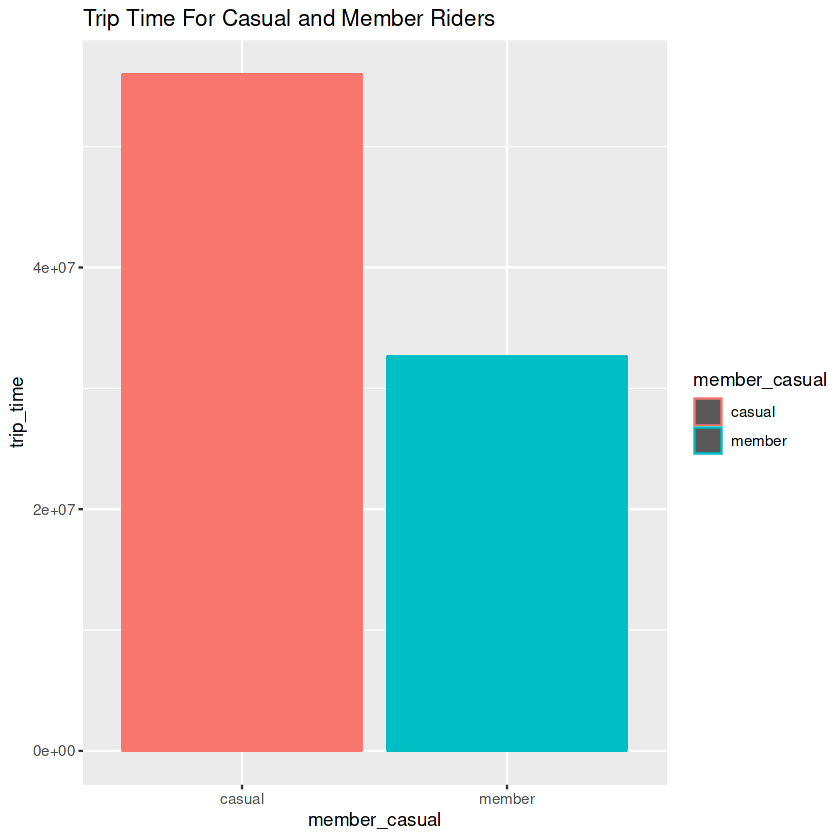

In [51]:
ggplot(trip_data2) + geom_col(aes(x = member_casual, y = trip_time, col = member_casual)) +
labs(title = "Trip Time For Casual and Member Riders ")

The data shows casual riders uses the bike more than the Member riders.

In [105]:
mont <- trip_data2 %>%
count(month)

mont

month,n
<chr>,<int>
Apr,294487
Aug,595923
Dec,112343
Feb,42270
Jan,82597
Jul,541672
Jun,337755
Mar,203292
May,444877


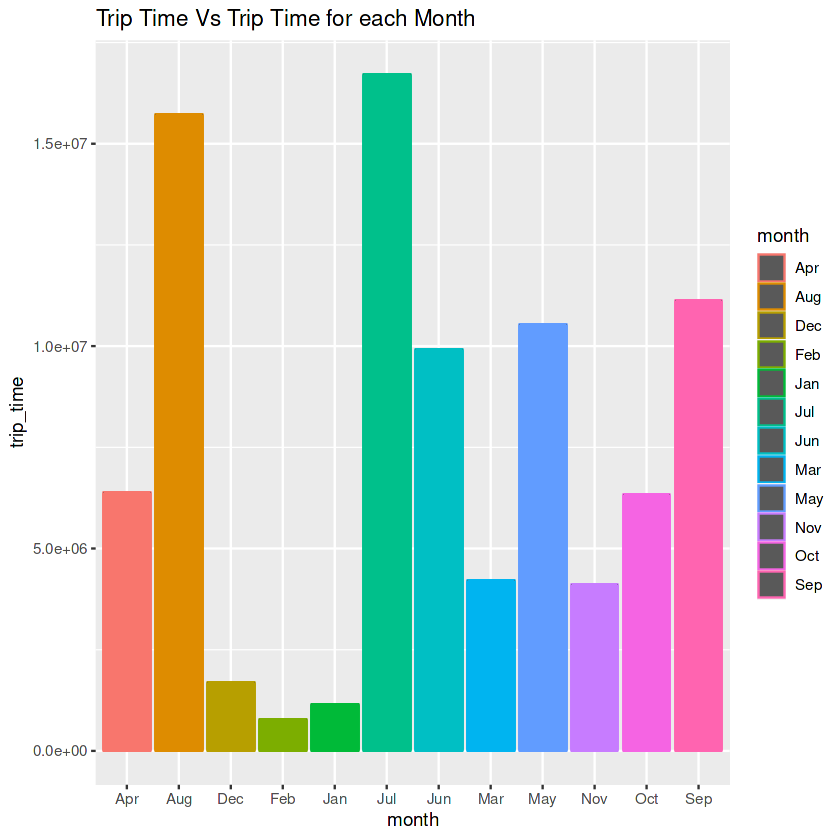

In [106]:
ggplot(trip_data2, aes(x = month, y = trip_time, col = month)) + 
 geom_bar(stat = "identity") + labs(title = "Trip Time Vs Trip Time for each Month ")

In [54]:
trip <- write_csv(trip_data2, "./processed_trip_data.csv")

In [107]:
bike_type <- trip_data2 %>%
count(rideable_type)

bike_type

rideable_type,n
<chr>,<int>
classic_bike,830296
docked_bike,2296084
electric_bike,570835


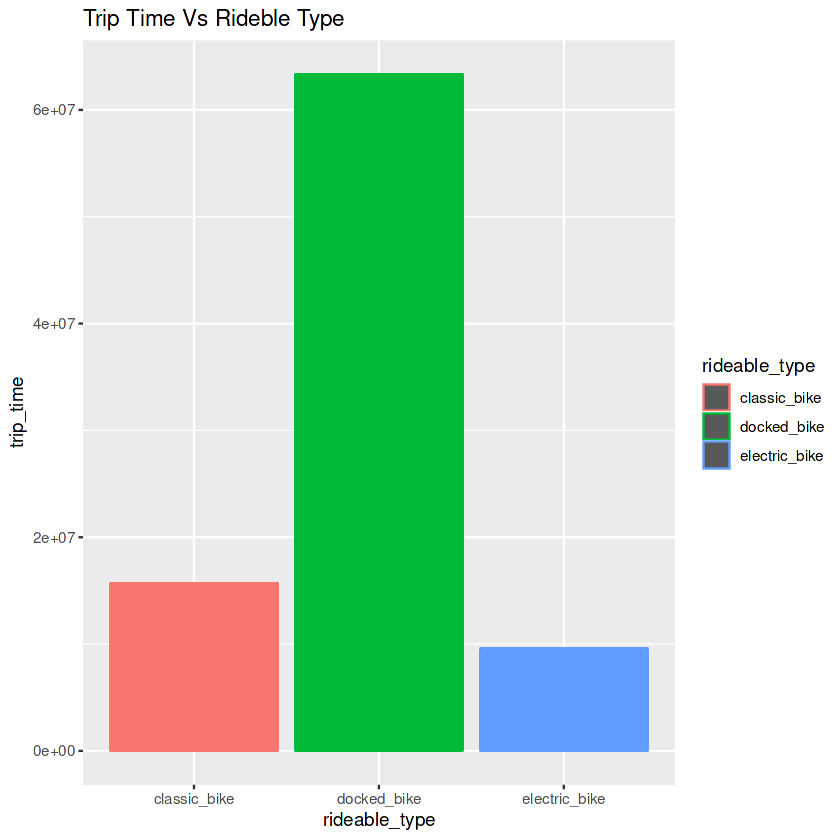

In [57]:
ggplot(trip_data2, aes(x =rideable_type, y = trip_time, col = rideable_type)) + 
geom_bar(stat = "identity") +
labs(title = "Trip Time Vs Rideble Type")
   

Customer prefers docked_bike more than classic and electric bikes. 

In [58]:
day_count <- trip_data2 %>%
count(day)

day_count

day,n
<chr>,<int>
Friday,541640
Monday,456315
Saturday,691252
Sunday,583185
Thursday,485279
Tuesday,457744
Wednesday,481800


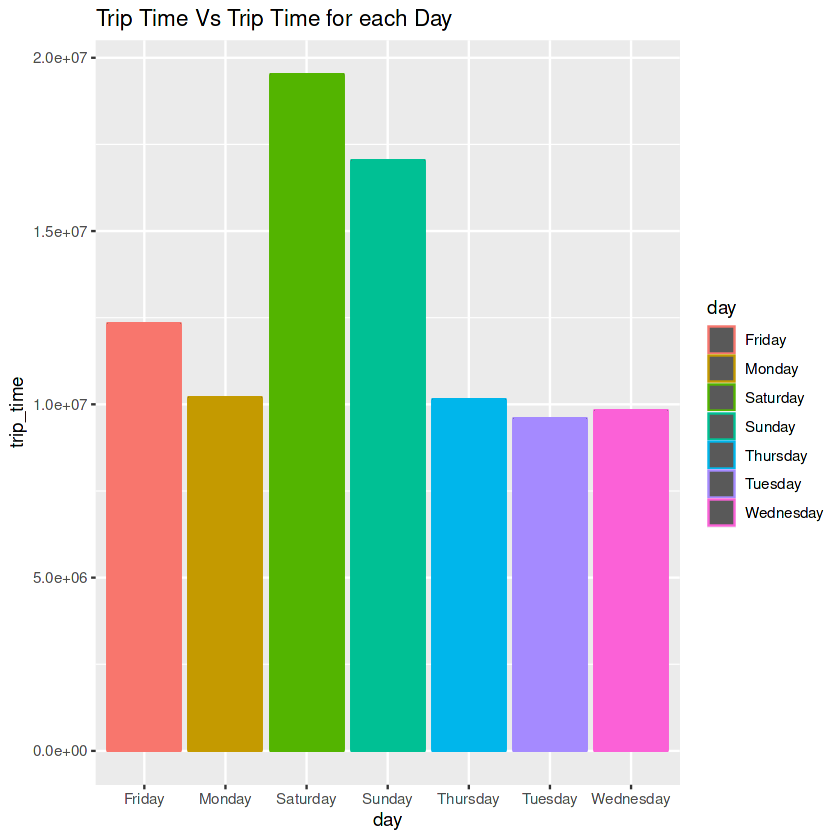

In [59]:
ggplot(trip_data2, aes(x = day, y = trip_time, col = day)) +
geom_col() + 
labs(title = "Trip Time Vs Trip Time for each Day")

**Key Findings**

1. The count of Casual riders are 1556425  and Member riders are 2140790. 

2. In the month of September, August and July bikes were largely used by the both casual and member riders.

3. Casual Riders used the bikes predominantly in Friday, saturday and sunday. Casual riders could be anyone like tourist.

4. Member riders used the bikes predominantly in weekdays. Member riders could be office goers and  most likely they used the bike for work purpose. That is why they paid extra fee and got membership.

5. Docked bike are highly used by both casual and member riders. All three types of bikes are highly used by thighly used be member riders.




**Recommandations**
1. Offering Annual membership for only weekends may encourage the casual rider to become the member.

2. Campaigning about the benefits of cycling on daily may increase the number of Members.

3. Give Limited time offers on membership fee for riders who get membership.

4. Give offers for members to appreciate them and to continued to be a Member rider.

5. Give the Memers an option for referring others to get a membership and Provide gifts or offer on membership fee, if someone get membership using their referral. 

